In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Given Data
data = {
    "Monthly_Subscription_Fee": 30,
    "Monthly_Churn_Rate": 0.20,
    "Gross_Margin": 0.60,
    "Target_Customers": 1000,
    "Customer_Acquisition_Cost": 330,
    "Projected_Click_Through_Rate": 0.02,
    "Projected_Conversion_Rate": 0.05,
    "Cost_per_1000_Impressions": 10
}




In [ ]:
# Customer Segment Data
segment_data = {
    "Segment": ["Premium", "Standard", "Trial"],
    "Bonus_Percentage": [0.10, 0.00, -0.20]}

In [ ]:
# Convert segment data to DataFrame
segment_df = pd.DataFrame(segment_data)


In [ ]:
# Step 1: Calculate Average Customer Lifetime Value (LTV)
base_LTV = (data["Monthly_Subscription_Fee"] * data["Gross_Margin"]) / data["Monthly_Churn_Rate"]
segment_df["Adjusted_LTV"] = base_LTV * (1 + segment_df["Bonus_Percentage"])


In [ ]:
# Step 2: Estimated Ad Budget Based on CAC
estimated_ad_budget = data["Target_Customers"] * data["Customer_Acquisition_Cost"]



In [ ]:
# Step 3: Required Impressions & Ad Budget Based on CPM
required_clicks = data["Target_Customers"] / data["Projected_Conversion_Rate"]
required_impressions = required_clicks / data["Projected_Click_Through_Rate"]
ad_budget_CPM = (required_impressions / 1000) * data["Cost_per_1000_Impressions"]


In [ ]:
# Display Calculations
print("Base LTV:", base_LTV)
print("Adjusted LTV per Segment:\n", segment_df)
print("Estimated Ad Budget (CAC Method):", estimated_ad_budget)
print("Required Impressions:", required_impressions)
print("Ad Budget (CPM Method):", ad_budget_CPM)


Base LTV: 90.0
Adjusted LTV per Segment:
     Segment  Bonus_Percentage  Adjusted_LTV
0   Premium               0.1          99.0
1  Standard               0.0          90.0
2     Trial              -0.2          72.0
Estimated Ad Budget (CAC Method): 330000
Required Impressions: 1000000.0
Ad Budget (CPM Method): 10000.0


<ipython-input-49-f0ca35b1a8be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_df["Segment"], y=segment_df["Adjusted_LTV"], palette="viridis")


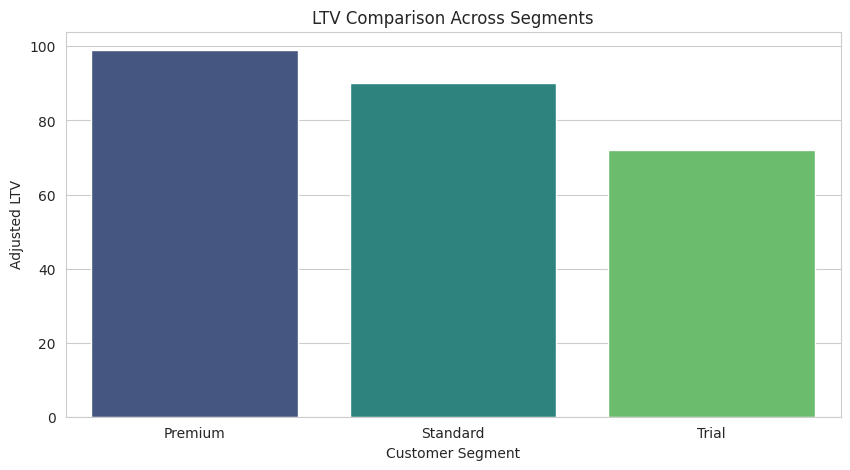

In [ ]:
# Step 4: Visualizations
plt.figure(figsize=(10, 5))
sns.barplot(x=segment_df["Segment"], y=segment_df["Adjusted_LTV"], palette="viridis")
plt.title("LTV Comparison Across Segments")
plt.xlabel("Customer Segment")
plt.ylabel("Adjusted LTV")
plt.show()



#It compares the Adjusted LTV across different customer segments.

Helps in identifying which segments are most valuable (higher LTV).

Provides insights for targeting high-value customers for better marketing and retention.

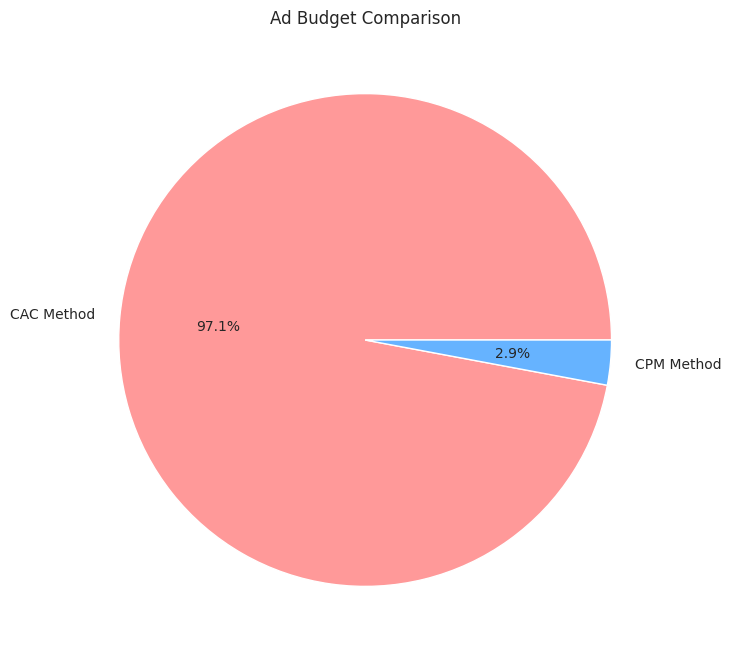

In [ ]:
# Pie Chart for Budget Comparison
budget_data = [estimated_ad_budget, ad_budget_CPM]
labels = ["CAC Method", "CPM Method"]
plt.figure(figsize=(8, 8))
plt.pie(budget_data, labels=labels, autopct="%1.1f%%", colors=["#ff9999", "#66b3ff"])
plt.title("Ad Budget Comparison")
plt.show()


# Breakdown of the total ad budget into two categories.

Which method (CAC or CPM) gets more budget allocation (based on percentage).

Helps in budget optimization decisions by seeing which method dominates.

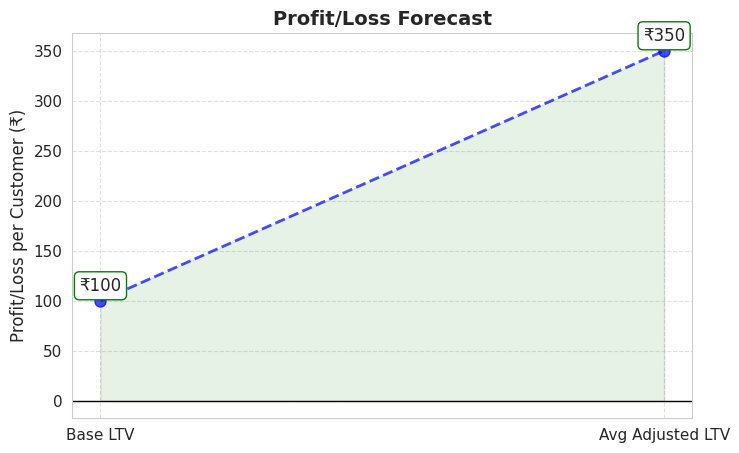

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set modern Seaborn style
sns.set_style("whitegrid")

# Sample Data (Replace with actual values)
base_LTV = 500
adjusted_LTV = 750
customer_acquisition_cost = 400

# Profit/Loss Calculations
profit_loss = [base_LTV - customer_acquisition_cost, adjusted_LTV - customer_acquisition_cost]
labels = ["Base LTV", "Avg Adjusted LTV"]
colors = ["red" if val < 0 else "green" for val in profit_loss]  # Red for loss, Green for profit

# Create the figure
plt.figure(figsize=(8, 5))
plt.plot(labels, profit_loss, marker="o", linestyle="--", linewidth=2, markersize=8, color="blue", alpha=0.7)

# Add data labels with conditional color coding
for i, txt in enumerate(profit_loss):
    plt.text(labels[i], txt + 10, f"₹{txt}", fontsize=12, ha="center",
             bbox=dict(facecolor="white", edgecolor=colors[i], boxstyle="round,pad=0.3"))

# Highlight positive & negative regions
plt.axhline(0, color="black", linestyle="-", linewidth=1)
plt.fill_between(labels, profit_loss, 0, where=[p >= 0 for p in profit_loss], color="green", alpha=0.1)
plt.fill_between(labels, profit_loss, 0, where=[p < 0 for p in profit_loss], color="red", alpha=0.1)

# Customization
plt.title("Profit/Loss Forecast", fontsize=14, fontweight="bold")
plt.ylabel("Profit/Loss per Customer (₹)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


#This Profit/Loss Forecast Line Graph helps in analyzing the profitability of customers based on their Lifetime Value (LTV) and Customer Acquisition Cost (CAC).

It compares:

Base LTV (Original lifetime value of a customer).

Adjusted LTV (After modifications like retention improvements, upsells, etc.).

Customer Acquisition Cost (CAC) (The cost required to acquire a customer).

 Key Insights from the Graph
Profit/Loss Per Customer

If the profit value is positive (above 0 line) → The company is profitable per customer.

If the profit value is negative (below 0 line) → The company is losing money per customer.

Impact of Adjusted LTV

If Adjusted LTV results in higher profit, it means strategies like customer retention, upselling, or premium offerings are working well.

If profit remains low or negative, it suggests the customer acquisition cost is too high compared to revenue generated.

Highlighted Positive & Negative Regions

Green area → Indicates profit-making segments.

Red area → Indicates loss-making segments.

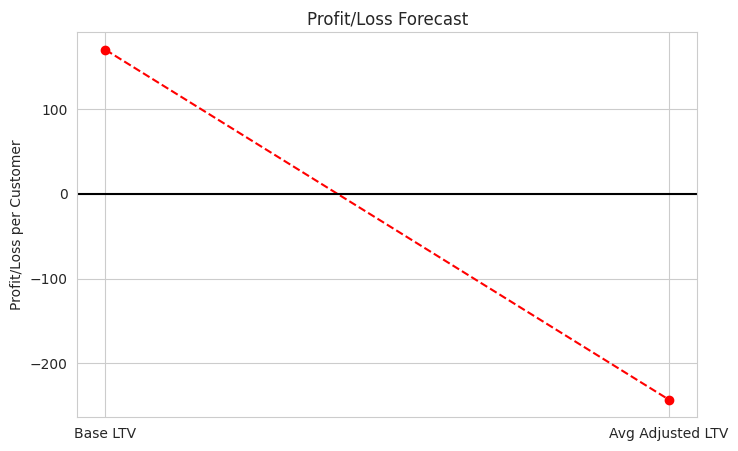

In [ ]:
# Line Graph for Profit/Loss Forecast
profit_loss = [base_LTV - data["Customer_Acquisition_Cost"],
               segment_df["Adjusted_LTV"].mean() - data["Customer_Acquisition_Cost"]]
labels = ["Base LTV", "Avg Adjusted LTV"]
plt.figure(figsize=(8, 5))
plt.plot(labels, profit_loss, marker="o", linestyle="--", color="red")
plt.axhline(0, color="black", linestyle="-")
plt.title("Profit/Loss Forecast")
plt.ylabel("Profit/Loss per Customer")
plt.show()

Enter total fixed costs: 30
Enter variable cost per customer: 330
Enter expected number of customers: 1000
Enter expected revenue per customer: 0.20

--- Financial Analysis Summary ---
Total Budget Required: ₹330,030.00
Expected Revenue: ₹200.00
Net Profit: ₹-329,830.00
Return on Investment (ROI): -99.94%
Break-even Point (Customers Needed): Not Achievable


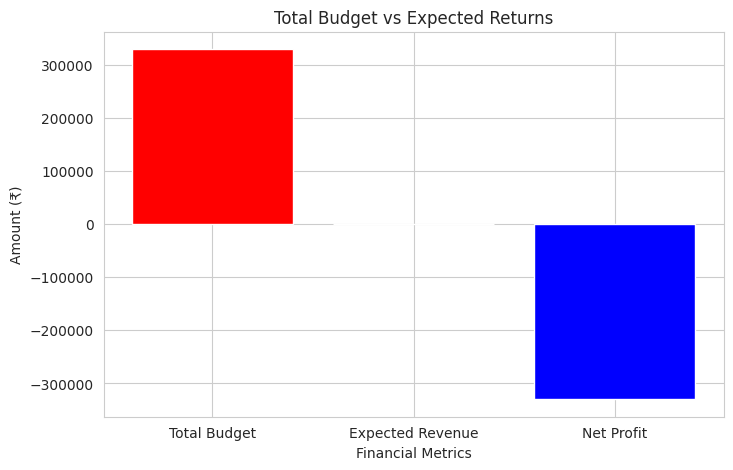

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the Budget and Revenue Inputs
fixed_costs = float(input("Enter total fixed costs: "))  # Infrastructure, setup, software, etc.
variable_cost_per_unit = float(input("Enter variable cost per customer: "))  # Marketing, support, etc.
expected_customers = int(input("Enter expected number of customers: "))  # Forecasted customer count
revenue_per_customer = float(input("Enter expected revenue per customer: "))  # Avg revenue per user

# Step 2: Compute Key Financial Metrics
total_variable_cost = variable_cost_per_unit * expected_customers
total_budget_required = fixed_costs + total_variable_cost
expected_revenue = expected_customers * revenue_per_customer
net_profit = expected_revenue - total_budget_required

# Step 3: ROI Calculation
roi = (net_profit / total_budget_required) * 100 if total_budget_required > 0 else 0

# Step 4: Break-even Calculation
break_even_customers = fixed_costs / (revenue_per_customer - variable_cost_per_unit) if (revenue_per_customer - variable_cost_per_unit) > 0 else "Not Achievable"

# Step 5: Display the Financial Summary
print("\n--- Financial Analysis Summary ---")
print(f"Total Budget Required: ₹{total_budget_required:,.2f}")
print(f"Expected Revenue: ₹{expected_revenue:,.2f}")
print(f"Net Profit: ₹{net_profit:,.2f}")
print(f"Return on Investment (ROI): {roi:.2f}%")
print(f"Break-even Point (Customers Needed): {break_even_customers if isinstance(break_even_customers, str) else int(break_even_customers)}")

# Step 6: Visualization (Budget vs Returns)
categories = ["Total Budget", "Expected Revenue", "Net Profit"]
values = [total_budget_required, expected_revenue, net_profit]

plt.figure(figsize=(8,5))
plt.bar(categories, values, color=['red', 'green', 'blue'])
plt.xlabel("Financial Metrics")
plt.ylabel("Amount (₹)")
plt.title("Total Budget vs Expected Returns")
plt.show()


In [ ]:
!pip install XlsxWriter
import pandas as pd
# Export to Excel using XlsxWriter as the engine
with pd.ExcelWriter("customer_acquisition_plan.xlsx", engine='xlsxwriter') as writer:
    segment_df.to_excel(writer, sheet_name="LTV Analysis", index=False)
    summary_df = pd.DataFrame({
        "Metric": ["Base LTV", "Estimated Ad Budget (CAC)", "Required Impressions", "Ad Budget (CPM)"],
        "Value": [base_LTV, estimated_ad_budget, required_impressions, ad_budget_CPM]
    })
    summary_df.to_excel(writer, sheet_name="Summary Metrics", index=False)

    # Create a simple dashboard
    workbook = writer.book
    worksheet = workbook.add_worksheet("Financial Plan") # Create a new sheet
    chart = workbook.add_chart({'type': 'column'})

    # Add data series for the chart
    # Note: Adjust the sheet name and data ranges as needed
    chart.add_series({
        'categories': ['LTV Analysis', 1, 0, 3, 0],  # Assuming data is in 'LTV Analysis' sheet
        'values': ['LTV Analysis', 1, 1, 3, 1],
        'name': 'LTV Comparison'
    })

    # Configure chart title and labels
    chart.set_title({'name': 'LTV Comparison Across Segments'})
    chart.set_x_axis({'name': 'Segment'})
    chart.set_y_axis({'name': 'LTV'})

    # Insert chart into the sheet
    worksheet.insert_chart('D2', chart)

     # Create Profit/Loss Chart
    chart_profit_loss = workbook.add_chart({'type': 'column'})
    chart_profit_loss.add_series({
        'categories': ['Financial Plan', 7, 0, 8, 0],
        'values': ['Financial Plan', 7, 1, 8, 1],
        'name': 'Profit/Loss'
    })
    chart_profit_loss.set_title({'name': 'Expected Revenue vs Profit/Loss'})
    chart_profit_loss.set_x_axis({'name': 'Metric'})
    chart_profit_loss.set_y_axis({'name': 'Amount (£)'})
    worksheet.insert_chart('D15', chart_profit_loss)

print(f"Excel file saved: customer_acquisition_plan.xlsx") # Prints the filename

Excel file saved: customer_acquisition_plan.xlsx
